In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.model_selection import GridSearchCV

In [3]:
import pickle

In [4]:
%load_ext pycodestyle_magic

In [5]:
%pycodestyle_on

In [6]:
from sklearn import metrics

In [7]:
from sklearn.model_selection import train_test_split

In [10]:
df = pd.read_csv("Stats.csv", index_col=0)

In [11]:
# change string with % to float
def proc(acc):
    acc = acc[:-1]
    return acc

1:1: E265 block comment should start with '# '


In [12]:
df["Accuracy"] = df["Accuracy"].apply(proc).apply(float)

In [13]:
df.head(2)

,Rating,Accuracy,Shot fired,Hits,Deaths,DMG_Get
0,70.8,20.1,3509,704,40,464
1,55.8,15.8,4771,753,54,591


# Delete Outliers

In [15]:
df = df[df["Rating"] < 100]

In [27]:
df = df.drop(1714)

In [28]:
X = df.drop("Rating", axis=1)
y = df["Rating"]

In [29]:
df

,Rating,Accuracy,Shot fired,Hits,Deaths,DMG_Get
0,70.8,20.1,3509,704,40,464
1,55.8,15.8,4771,753,54,591
2,47.6,16.7,3526,589,59,549
3,47.5,15.2,3184,484,42,442
4,24.7,10.3,3481,359,66,583
...,...,...,...,...,...,...
1845,26.4,3.2,1393,44,0,58
1846,21.1,6.4,1643,105,11,186
1847,20.9,3.6,2208,80,5,136
1848,19.9,1.9,1630,31,2,53


In [30]:
# Statistics needed to check the model in the application
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=110)
X_test.to_csv("data/X_test.csv", encoding="utf-8")
y_test.to_csv("data/y_test.csv", encoding="utf-8")

2:80: E501 line too long (90 > 79 characters)


In [31]:
X_train

,Accuracy,Shot fired,Hits,Deaths,DMG_Get
1727,17.3,4283,740,30,337
211,9.7,2633,256,51,434
267,19.6,1305,256,61,457
68,12.8,3875,495,38,431
201,20.9,1448,303,47,388
...,...,...,...,...,...
462,11.3,934,106,52,297
409,15.2,1811,275,56,345
1384,16.3,3261,531,48,439
64,13.9,423,59,52,317


# Linear Regression

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
lm = LinearRegression()

In [34]:
lm.fit(X_train, y_train)

LinearRegression()

In [35]:
predictions = lm.predict(X_test)

In [36]:
df.columns

Index(['Rating', 'Accuracy', 'Shot fired', 'Hits', 'Deaths', 'DMG_Get'], dtype='object')

In [37]:
lm.coef_

array([ 2.16431479,  0.0058519 ,  0.05404575,  0.06880526, -0.09288599])

In [38]:
predictions = lm.predict(X_test)

In [39]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 7.150796350487074
MSE: 96.84184456591063
RMSE: 9.840825400641485


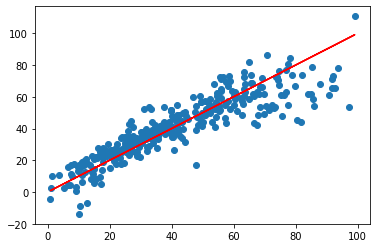

In [41]:
plt.scatter(y_test, predictions)

# Real Value
plt.plot(y_test, y_test, 'r')

In [43]:
with open("Models/linear_regression.pkl", "wb") as file:
    pickle.dump(lm, file)

# Linear Regression(Cheated model)

In [45]:
lm_3 = LinearRegression()

In [46]:
X_train_3 = X_train.drop(["Shot fired", "Deaths"], axis=1)

In [47]:
X_test_3 = X_test.drop(["Shot fired", "Deaths"], axis=1)

In [48]:
X_test_3.to_csv("data/X_test_3.csv", encoding="utf-8")

In [49]:
X_train_3

,Accuracy,Hits,DMG_Get
1727,17.3,740,337
211,9.7,256,434
267,19.6,256,457
68,12.8,495,431
201,20.9,303,388
...,...,...,...
462,11.3,106,297
409,15.2,275,345
1384,16.3,531,439
64,13.9,59,317


In [50]:
lm_3.fit(X_train_3, y_train)

LinearRegression()

1:19: E231 missing whitespace after ','


In [51]:
predictions = lm_3.predict(X_test_3)

In [52]:
lm_3.coef_

array([ 1.49610642,  0.08859961, -0.0795861 ])

In [53]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 7.480374879277415
MSE: 104.78498770435505
RMSE: 10.236453863734015


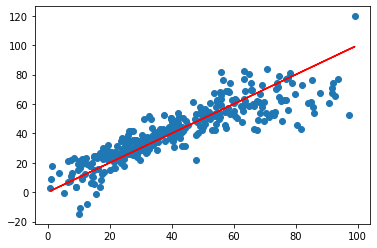

In [55]:
plt.scatter(y_test, predictions)

# Real Value
plt.plot(y_test, y_test, 'r')

In [57]:
with open("Models/linear_regression_3.pkl", "wb") as file:
    pickle.dump(lm_3, file)

# Random Forest

In [242]:
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor

In [243]:
grid_params = {"n_estimators": [1000,2000,4000],
              "max_depth": [4,5,6,7,8,9,10],
               "min_impurity_decrease": [0.01,0.02,0.05],
               "max_features":[2,3,4]
              }

In [244]:
grid_forest = GridSearchCV(RandomForestRegressor, param_grid = grid_params)

In [245]:
#Long Time !!!

In [246]:
#grid_forest.fit(X_train,y_train)

In [247]:
#grid_forest.best_params_

In [248]:
#preds = grid_forest.predict(X_test)

In [249]:
#print('MAE:', metrics.mean_absolute_error(y_test, preds))
#print('MSE:', metrics.mean_squared_error(y_test, preds))
#print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, preds)))

In [250]:
#Best model

In [251]:
forest = RandomForestRegressor(n_estimators= 1000, max_depth=10,criterion="mse", max_features=3)

In [252]:
forest.fit(X_train, y_train)

c:\users\kacpe\appdata\local\programs\python\python39\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning:

Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.



RandomForestRegressor(criterion='mse', max_depth=10, max_features=3,
                      n_estimators=1000)

In [253]:
preds = forest.predict(X_test)

In [254]:
print('MAE:', metrics.mean_absolute_error(y_test, preds))
print('MSE:', metrics.mean_squared_error(y_test, preds))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, preds)))

MAE: 5.717825876027578
MSE: 72.48996255419087
RMSE: 8.514103743447743


In [255]:
with open ("Models/forest.pkl", "wb") as file:
    pickle.dump(forest,file)

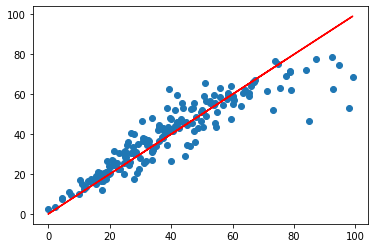

In [256]:
plt.scatter(y_test,preds)

# Real Value
plt.plot(y_test,y_test,'r')

# Random Forest(Cheated Model)


In [257]:
forest_3 = RandomForestRegressor(n_estimators= 3000, max_depth=3,criterion="mse", max_features=2)

In [258]:
forest_3.fit(X_train_3,y_train)

c:\users\kacpe\appdata\local\programs\python\python39\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning:

Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.



RandomForestRegressor(criterion='mse', max_depth=3, max_features=2,
                      n_estimators=3000)

In [259]:
print('MAE:', metrics.mean_absolute_error(y_test, preds))
print('MSE:', metrics.mean_squared_error(y_test, preds))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, preds)))

MAE: 5.717825876027578
MSE: 72.48996255419087
RMSE: 8.514103743447743


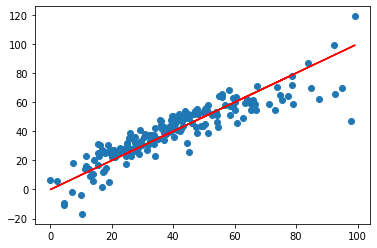

In [260]:
plt.scatter(y_test,predictions)

# Real Value
plt.plot(y_test,y_test,'r')

In [261]:
with open ("Models/forest_3.pkl", "wb") as file:
    pickle.dump(forest_3,file)

# Gradient Boost

In [262]:
from sklearn.ensemble import GradientBoostingRegressor

In [263]:
gradient = GradientBoostingRegressor()

In [264]:
param_grid_gradient = {"n_estimators": [100,150,200],
             "learning_rate": [0.02,0.03,0.05,0.1],
             "max_depth": [3,4],
                "criterion" : ["squared_error"],
                      "alpha":[0.5,0.7,0.8,0.9]}

In [265]:
grid_gradient = GridSearchCV(gradient,param_grid=param_grid_gradient)

In [266]:
grid_gradient.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingRegressor(),
             param_grid={'alpha': [0.5, 0.7, 0.8, 0.9],
                         'criterion': ['squared_error'],
                         'learning_rate': [0.02, 0.03, 0.05, 0.1],
                         'max_depth': [3, 4], 'n_estimators': [100, 150, 200]})

In [267]:
grid_gradient.best_params_

{'alpha': 0.9,
 'criterion': 'squared_error',
 'learning_rate': 0.1,
 'max_depth': 3,
 'n_estimators': 200}

In [268]:
grid_gradient.best_estimator_.feature_importances_

array([0.42270774, 0.01330649, 0.30171802, 0.06324433, 0.19902342])

In [269]:
pred_grid_gradient = grid_gradient.predict(X_test)

In [270]:
print('MAE:', metrics.mean_absolute_error(y_test, pred_grid_gradient))
print('MSE:', metrics.mean_squared_error(y_test, pred_grid_gradient))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_grid_gradient)))

MAE: 5.244605170104093
MSE: 61.614385276590646
RMSE: 7.849483121619579


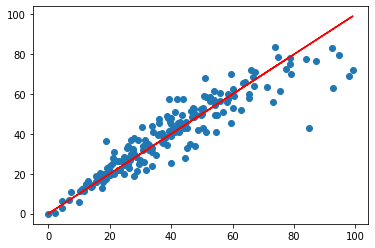

In [271]:
plt.scatter(y_test,pred_grid_gradient)

# Real Value
plt.plot(y_test,y_test,'r')

In [272]:
len(pred_grid_gradient)

190

In [273]:
with open ("Models/gradient.pkl", "wb") as file:
    pickle.dump(grid_gradient,file)

# Gradient Boost (Cheated)

In [274]:
gradient_3 = GradientBoostingRegressor()

In [275]:
gradient_3 = GridSearchCV(gradient_3,param_grid=param_grid_gradient)

In [276]:
gradient_3.fit(X_train_3,y_train)

GridSearchCV(estimator=GradientBoostingRegressor(),
             param_grid={'alpha': [0.5, 0.7, 0.8, 0.9],
                         'criterion': ['squared_error'],
                         'learning_rate': [0.02, 0.03, 0.05, 0.1],
                         'max_depth': [3, 4], 'n_estimators': [100, 150, 200]})

In [277]:
gradient_3.best_params_

{'alpha': 0.7,
 'criterion': 'squared_error',
 'learning_rate': 0.05,
 'max_depth': 3,
 'n_estimators': 200}

In [278]:
gradient_3.best_estimator_.feature_importances_

array([0.42794896, 0.32540823, 0.24664281])

In [279]:
pred_gradient_3 = gradient_3.predict(X_test_3)

In [280]:
print('MAE:', metrics.mean_absolute_error(y_test, pred_gradient_3))
print('MSE:', metrics.mean_squared_error(y_test, pred_gradient_3))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_gradient_3)))

MAE: 5.275190378978311
MSE: 64.2567909285027
RMSE: 8.016033366229378


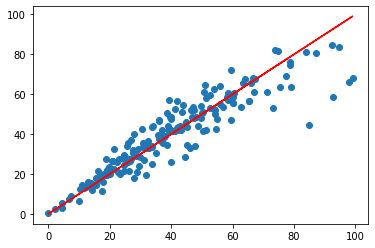

In [281]:
plt.scatter(y_test,pred_gradient_3)

# Real Value
plt.plot(y_test,y_test,'r')

In [282]:
with open ("Models/gradient_3.pkl", "wb") as file:
    pickle.dump(gradient_3,file)

# KNN

In [283]:
from sklearn.neighbors import KNeighborsRegressor

In [284]:
KNN = KNeighborsRegressor()

In [285]:
param_grid = {
    "n_neighbors": [2,3,4,5,6,7,8,9,10],
    "weights": ["uniform","distance"],
    "leaf_size": [10,20,30,40,50],
    "p": [1,2],
    "metric" :["cityblock","euclidean","l1","l2","manhattan"]
       
}

In [286]:
Grid_KNN = GridSearchCV(KNN, param_grid=param_grid)

In [287]:
Grid_KNN.fit(X_train,y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'leaf_size': [10, 20, 30, 40, 50],
                         'metric': ['cityblock', 'euclidean', 'l1', 'l2',
                                    'manhattan'],
                         'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2], 'weights': ['uniform', 'distance']})

In [288]:
X_train.columns

Index(['Accuracy', 'Shot fired', 'Hits', 'Deaths', 'DMG_Get'], dtype='object')

In [289]:
Grid_KNN.best_params_

{'leaf_size': 10,
 'metric': 'euclidean',
 'n_neighbors': 4,
 'p': 1,
 'weights': 'distance'}

In [290]:
preds = Grid_KNN.predict(X_test)

In [291]:
print('MAE:', metrics.mean_absolute_error(y_test, preds))
print('MSE:', metrics.mean_squared_error(y_test, preds))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, preds)))

MAE: 7.926369358587341
MSE: 129.69206926628914
RMSE: 11.388242589016496


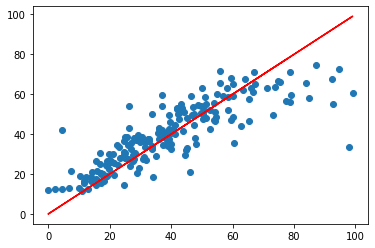

In [292]:
plt.scatter(y_test,preds)

# Real Value
plt.plot(y_test,y_test,'r')

In [293]:
with open ("Models/KNN.pkl", "wb") as file:
    pickle.dump(Grid_KNN,file)

# KNN (Cheated Model)

In [294]:
KNN_3 = KNeighborsRegressor()

In [295]:
Grid_KNN_3 = GridSearchCV(KNN_3, param_grid=param_grid)

In [296]:
Grid_KNN_3.fit(X_train_3,y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'leaf_size': [10, 20, 30, 40, 50],
                         'metric': ['cityblock', 'euclidean', 'l1', 'l2',
                                    'manhattan'],
                         'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2], 'weights': ['uniform', 'distance']})

In [297]:
Grid_KNN_3.best_params_

{'leaf_size': 10,
 'metric': 'cityblock',
 'n_neighbors': 7,
 'p': 1,
 'weights': 'distance'}

In [298]:
preds = Grid_KNN_3.predict(X_test_3)

In [299]:
print('MAE:', metrics.mean_absolute_error(y_test, preds))
print('MSE:', metrics.mean_squared_error(y_test, preds))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, preds)))

MAE: 6.186779064527043
MSE: 73.2634589560759
RMSE: 8.559407628806792


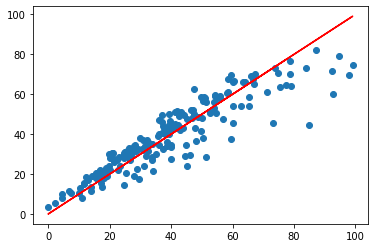

In [300]:
plt.scatter(y_test,preds)

# Real Value
plt.plot(y_test,y_test,'r')

In [301]:
with open ("Models/KNN_3.pkl", "wb") as file:
    pickle.dump(Grid_KNN_3,file)

# SVR

In [302]:
from sklearn.svm import LinearSVR

In [303]:
SVR = LinearSVR(random_state=110)

In [304]:
grid_params = {
    "epsilon":[0.01,0.05,0.1,0.2,0,5],
    "C":[0.5,1,2,3,5] 
}

In [305]:
Grid_SVR = GridSearchCV(SVR, param_grid = grid_params)

In [306]:
Grid_SVR.fit(X_train,y_train)

c:\users\kacpe\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

c:\users\kacpe\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

c:\users\kacpe\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

c:\users\kacpe\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

c:\users\kacpe\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

c:\users\kacpe\appdata\local\programs\python\python39\lib\site-package

c:\users\kacpe\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

c:\users\kacpe\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

c:\users\kacpe\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

c:\users\kacpe\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

c:\users\kacpe\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

c:\users\kacpe\appdata\local\programs\python\python39\lib\site-package

c:\users\kacpe\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

c:\users\kacpe\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

c:\users\kacpe\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

c:\users\kacpe\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

c:\users\kacpe\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

c:\users\kacpe\appdata\local\programs\python\python39\lib\site-package

c:\users\kacpe\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

c:\users\kacpe\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

c:\users\kacpe\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

c:\users\kacpe\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

c:\users\kacpe\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

c:\users\kacpe\appdata\local\programs\python\python39\lib\site-package

GridSearchCV(estimator=LinearSVR(random_state=110),
             param_grid={'C': [0.5, 1, 2, 3, 5],
                         'epsilon': [0.01, 0.05, 0.1, 0.2, 0, 5]})

In [307]:
preds = Grid_SVR.predict(X_test)

In [308]:
Grid_SVR.best_params_

{'C': 0.5, 'epsilon': 5}

In [309]:
SVR = LinearSVR(max_iter=500000, C = 1, epsilon=1,random_state=110,intercept_scaling = 1)

In [310]:
SVR.fit(X_train,y_train)

c:\users\kacpe\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



LinearSVR(C=1, epsilon=1, intercept_scaling=1, max_iter=500000,
          random_state=110)

In [311]:
preds = SVR.predict(X_test)

In [312]:
print('MAE:', metrics.mean_absolute_error(y_test, preds))
print('MSE:', metrics.mean_squared_error(y_test, preds))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, preds)))

MAE: 6.029991035151153
MSE: 84.26325403687659
RMSE: 9.179501840343875


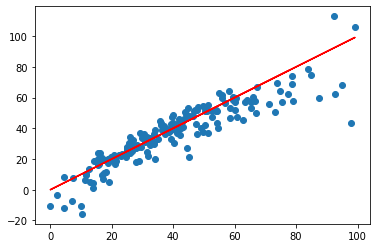

In [313]:
plt.scatter(y_test,preds)

# Real Value
plt.plot(y_test,y_test,'r')

In [314]:
with open ("Models/SVRLinear.pkl", "wb") as file:
    pickle.dump(SVR,file)

# SVR(Cheated Model)

In [315]:
Grid_SVR_3 = GridSearchCV(SVR, param_grid = grid_params)

In [316]:
Grid_SVR_3.fit(X_train_3,y_train)

c:\users\kacpe\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

c:\users\kacpe\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

c:\users\kacpe\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

c:\users\kacpe\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

c:\users\kacpe\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

c:\users\kacpe\appdata\local\programs\python\python39\lib\site-package

c:\users\kacpe\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

c:\users\kacpe\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

c:\users\kacpe\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

c:\users\kacpe\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

c:\users\kacpe\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

c:\users\kacpe\appdata\local\programs\python\python39\lib\site-package

c:\users\kacpe\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

c:\users\kacpe\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

c:\users\kacpe\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

c:\users\kacpe\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

c:\users\kacpe\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

c:\users\kacpe\appdata\local\programs\python\python39\lib\site-package

c:\users\kacpe\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

c:\users\kacpe\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

c:\users\kacpe\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

c:\users\kacpe\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

c:\users\kacpe\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

c:\users\kacpe\appdata\local\programs\python\python39\lib\site-package

GridSearchCV(estimator=LinearSVR(C=1, epsilon=1, intercept_scaling=1,
                                 max_iter=500000, random_state=110),
             param_grid={'C': [0.5, 1, 2, 3, 5],
                         'epsilon': [0.01, 0.05, 0.1, 0.2, 0, 5]})

In [317]:
preds = Grid_SVR_3.predict(X_test_3)

In [318]:
print('MAE:', metrics.mean_absolute_error(y_test, preds))
print('MSE:', metrics.mean_squared_error(y_test, preds))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, preds)))

MAE: 6.641463179772368
MSE: 85.39029503134924
RMSE: 9.240686935036228


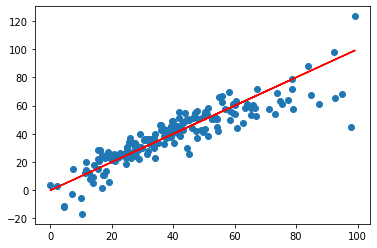

In [319]:
plt.scatter(y_test,preds)

# Real Value
plt.plot(y_test,y_test,'r')

In [320]:
with open ("Models/SVRLinear_3.pkl", "wb") as file:
    pickle.dump(Grid_SVR_3,file)

# Plots with Plotly (Tests!)

In [321]:
from plotly import __version__
%matplotlib inline
print(__version__) # requires version >= 1.9.0

5.9.0


In [322]:
import cufflinks as cf
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

In [323]:
import chart_studio.plotly as py

In [112]:
import plotly.express as px

In [113]:
init_notebook_mode(connected=True)

In [114]:
cf.go_offline()

In [115]:
fig2 = px.line(x = y_test, y = y_test,color_discrete_sequence=[ 'blue'])
fig2.add_scatter(x = y_test, y = preds, mode = "markers",name="Predictions")
fig2.show()

In [116]:
fig2 = px.scatter(x =y_test, y = y_test)
plotly_chart(fig2)

NameError: name 'plotly_chart' is not defined

In [ ]:
fig = plt.figure()
scater = plt.scatter(y_test,preds)
         #Perfect predictions
line = plt.plot(y_test,y_test,'r')